In [11]:
#환자의 치료 전과 후를 비교하여 효과성을 평가하는 코드 실습
#데이터 -> 랜덤 더미 데이터

import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
import matplotlib.pyplot as mlt

In [19]:
#치료 전,후 데이터 랜덤하게 생성

pre_treatment = np.random.randint(1,10, size=20)
post_treatment = np.random.randint(-3,4, size=20)

#데이터 프레임
data = pd.DataFrame({
    "pre_treatment" : pre_treatment,
    "post_treatment" : post_treatment
})

print(data)
data.to_csv("./data/treatment_data.csv", index=False, encoding='utf-8')

    pre_treatment  post_treatment
0               3              -3
1               9               0
2               4               3
3               8              -2
4               5               0
5               5              -3
6               7               2
7               7               0
8               7               1
9               4              -2
10              1               0
11              9               3
12              9               2
13              6               2
14              1              -3
15              5               0
16              1              -3
17              4               3
18              4               2
19              2               1


In [13]:
#data 가져오기
treatment_data = pd.read_csv("./data/treatment_data.csv")
#print(treatment_data)

#윌콕슨 부호 순위 검정 수행
stat, p = wilcoxon(treatment_data['pre_treatment'], treatment_data['post_treatment'])

#결과 출력
print('Statistic:', stat)
print('p-value:', p)
if p > 0.05 :
    print("Same distribution(fail to reject HO)")
else :
    print("Different distribution(reject HO)")

Statistic: 5.0
p-value: 1.9073486328125e-05
Different distribution(reject HO)


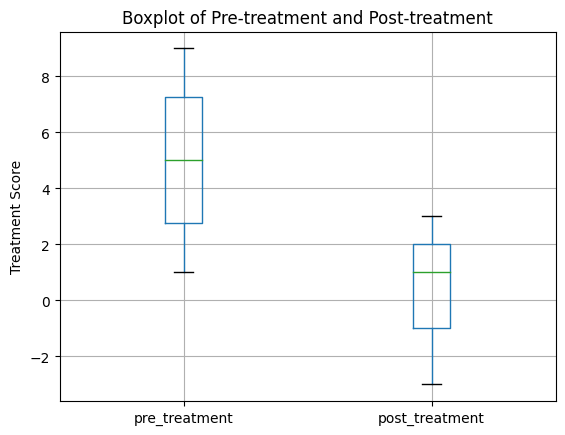

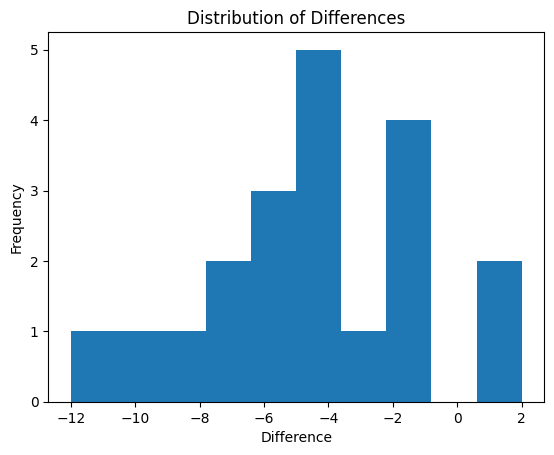

In [18]:
fig, ax = plt.subplots()
data.boxplot(['pre_treatment', 'post_treatment'], ax=ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')
plt.show()

fig, ax = plt.subplots()
data['diff'] = data['post_treatment'] - data['pre_treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differences')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
plt.show()
